# Data Science And Business Analytics : The Sparks Foundation

# Task 8 : Timeline Analysis : covid19

# Author : Mohammad Sayeed

Dataset : https://bit.ly/30d2gdi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.120850e+05,112082.000000,111067.000000,1.013960e+05,101551.000000,111067.000000,111494.000000,111491.000000,110481.000000,100818.000000,...,70370.000000,104502.000000,107660.000000,81614.000000,80428.000000,52496.000000,95039.000000,111817.000000,104595.000000,4007.000000
mean,1.375229e+06,6441.092129,6457.817624,3.520074e+04,145.872507,132.721702,16961.331557,82.006153,82.032597,357.999493,...,13.469389,259.154565,8.002469,10.597137,32.731936,50.751841,3.024773,73.258319,0.726647,18.042214
std,9.232972e+06,39376.301156,38965.396197,2.098892e+05,795.430708,743.692972,29241.478262,191.463970,162.144896,613.151266,...,19.979876,119.292683,4.260347,10.506503,13.499876,31.753882,2.453795,7.544800,0.150252,35.085082
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,...,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.864000e+03,3.000000,8.857000,6.500000e+01,0.000000,0.000000,325.866500,0.274000,1.503000,9.857750,...,0.600000,168.711000,5.310000,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,0.620000
50%,1.910700e+04,90.000000,111.429000,5.740000e+02,2.000000,1.571000,2549.504500,10.337000,14.123000,64.944000,...,2.200000,243.811000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,7.630000
75%,2.027130e+05,908.000000,958.857000,4.941000e+03,19.000000,15.429000,19968.703250,79.701000,88.908000,428.410750,...,21.200000,329.942000,10.080000,19.300000,41.100000,82.502000,3.861000,78.740000,0.848000,23.580000
max,2.285401e+08,906034.000000,826428.571000,4.691838e+06,17976.000000,14723.000000,208199.373000,8620.690000,3385.473000,5967.311000,...,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,410.900000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117873 entries, 0 to 117872
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               117873 non-null  object 
 1   continent                              112484 non-null  object 
 2   location                               117873 non-null  object 
 3   date                                   117873 non-null  object 
 4   total_cases                            112085 non-null  float64
 5   new_cases                              112082 non-null  float64
 6   new_cases_smoothed                     111067 non-null  float64
 7   total_deaths                           101396 non-null  float64
 8   new_deaths                             101551 non-null  float64
 9   new_deaths_smoothed                    111067 non-null  float64
 10  total_cases_per_million                111494 non-null  

In [8]:
df.shape

(117873, 62)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 62)


In [10]:
df.count()

iso_code                      117873
continent                     112484
location                      117873
date                          117873
total_cases                   112085
                               ...  
handwashing_facilities         52496
hospital_beds_per_thousand     95039
life_expectancy               111817
human_development_index       104595
excess_mortality                4007
Length: 62, dtype: int64

In [11]:
print(df.isnull().sum())

iso_code                           0
continent                       5389
location                           0
date                               0
total_cases                     5788
                               ...  
handwashing_facilities         65377
hospital_beds_per_thousand     22834
life_expectancy                 6056
human_development_index        13278
excess_mortality              113866
Length: 62, dtype: int64


In [12]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [13]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

C:\Users\mdsay\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2021-09-15,127083.0,266.0,4551.0,6482.0,1200458.0
2021-09-16,127368.0,285.0,4560.0,NaN,NaN
2021-09-17,127632.0,264.0,4562.0,NaN,NaN
2021-09-18,127739.0,107.0,4563.0,NaN,NaN
2021-09-19,127938.0,199.0,4567.0,NaN,NaN


Text(0.5, 0, 'Month')

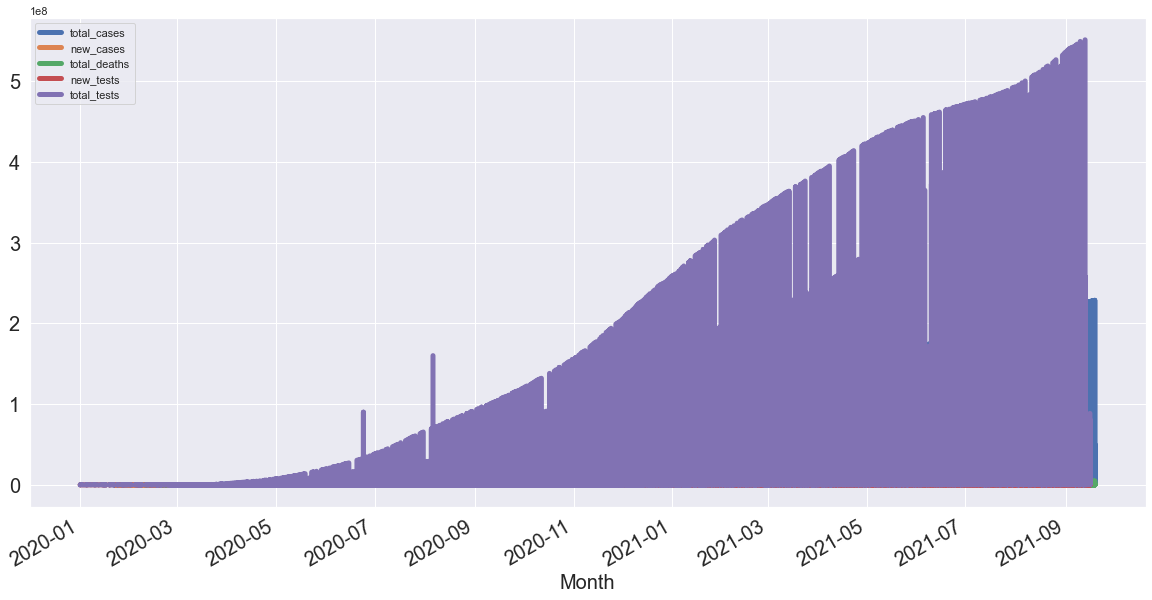

In [14]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

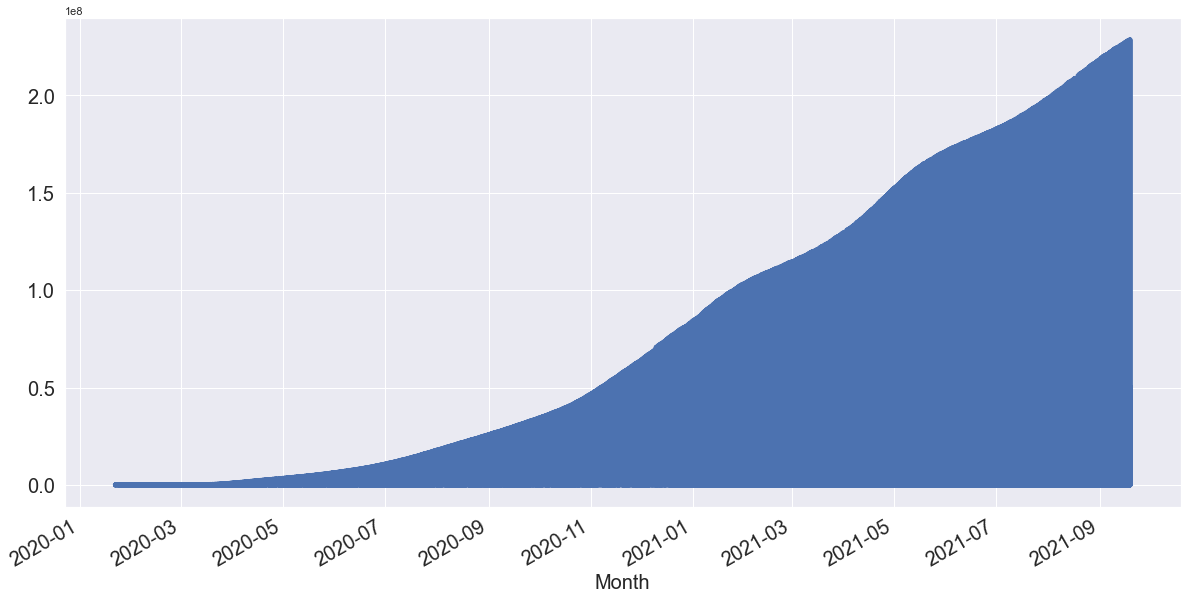

In [15]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

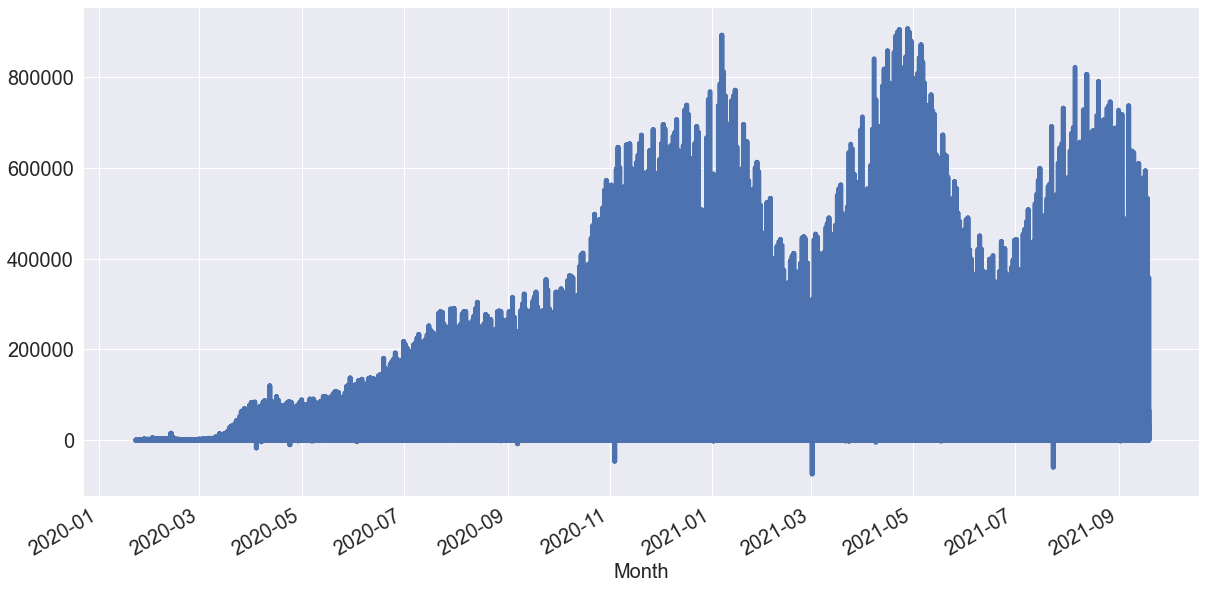

In [16]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

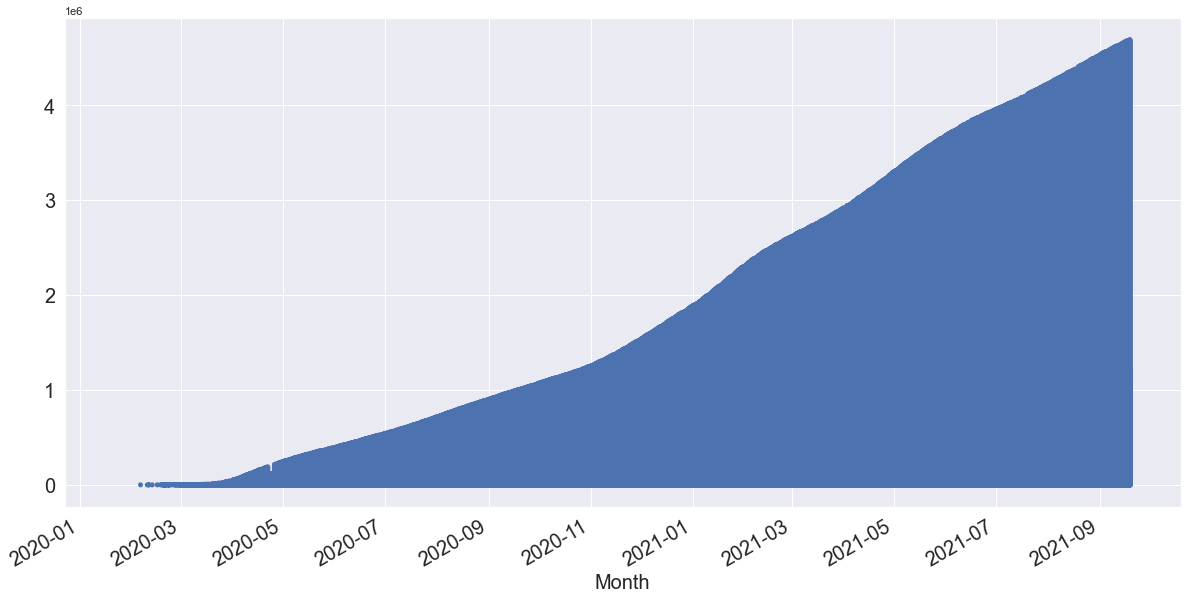

In [17]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

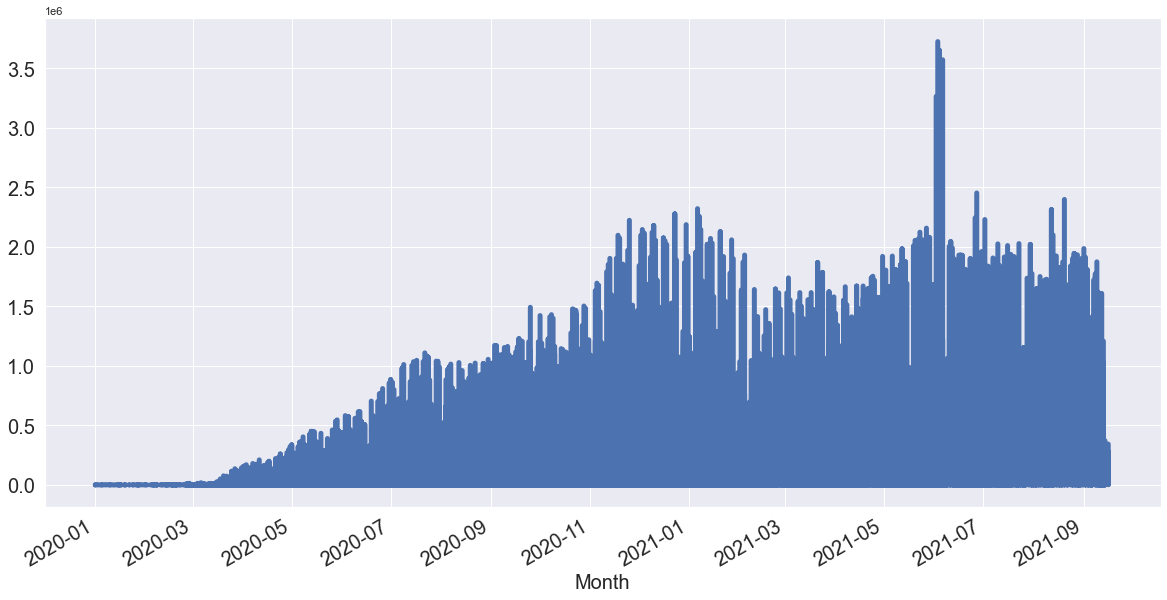

In [18]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

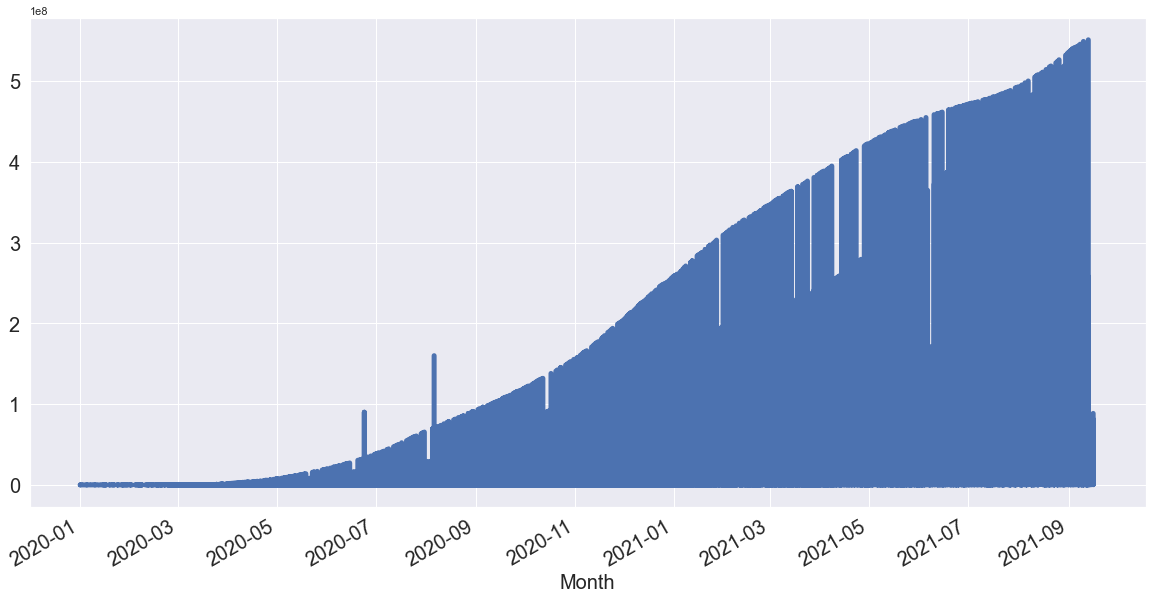

In [19]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Trends and Seasonality in timeseries Data

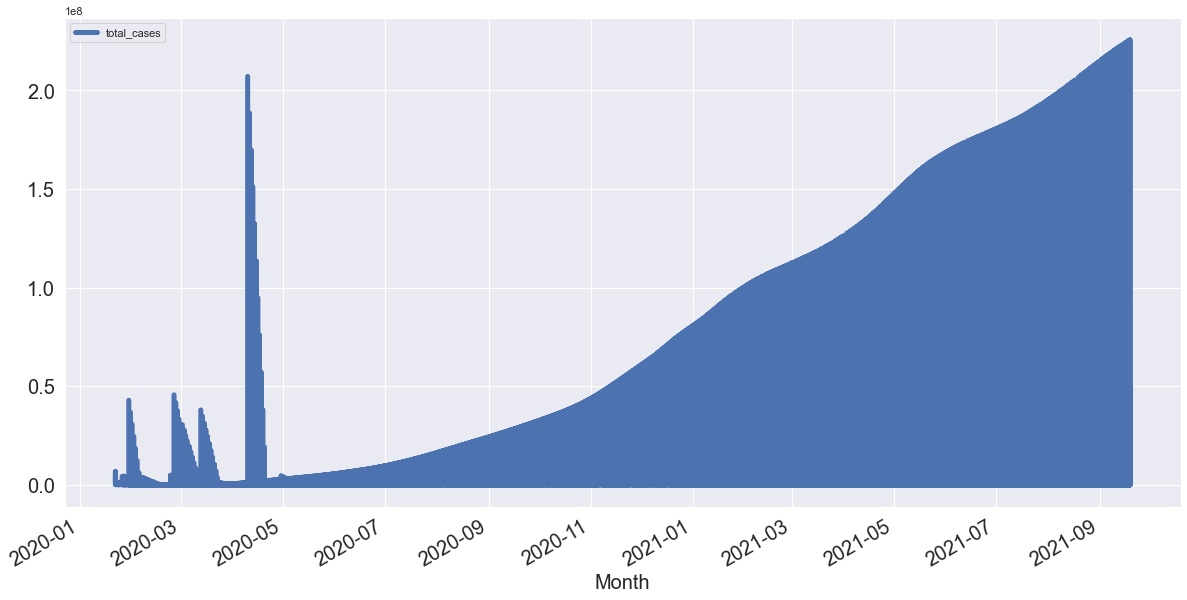

In [20]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

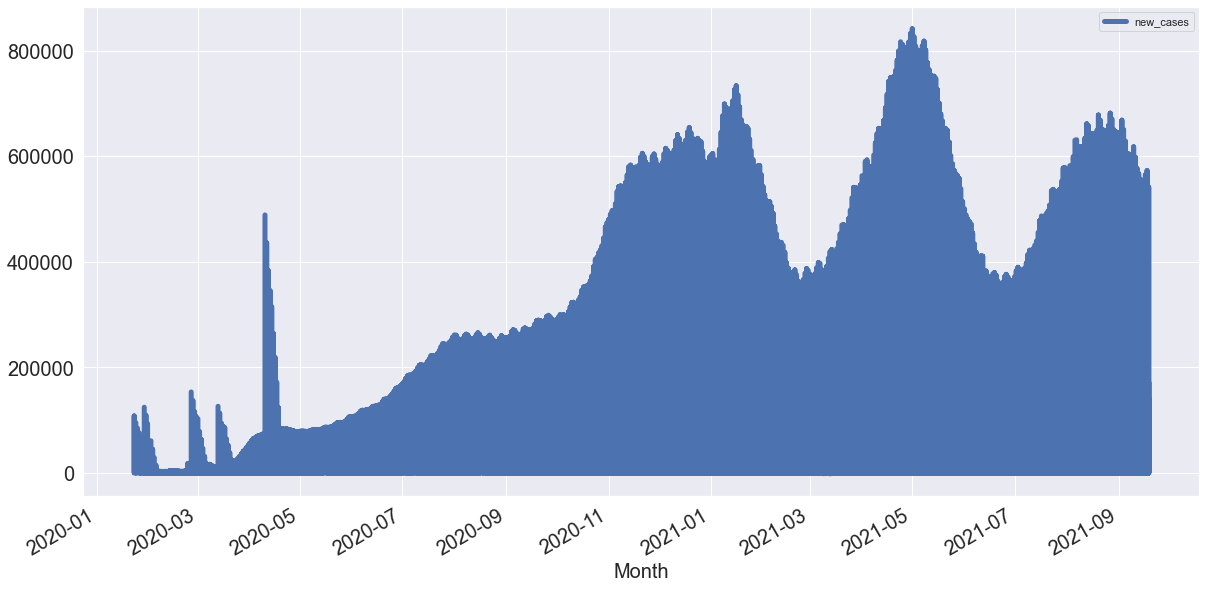

In [21]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

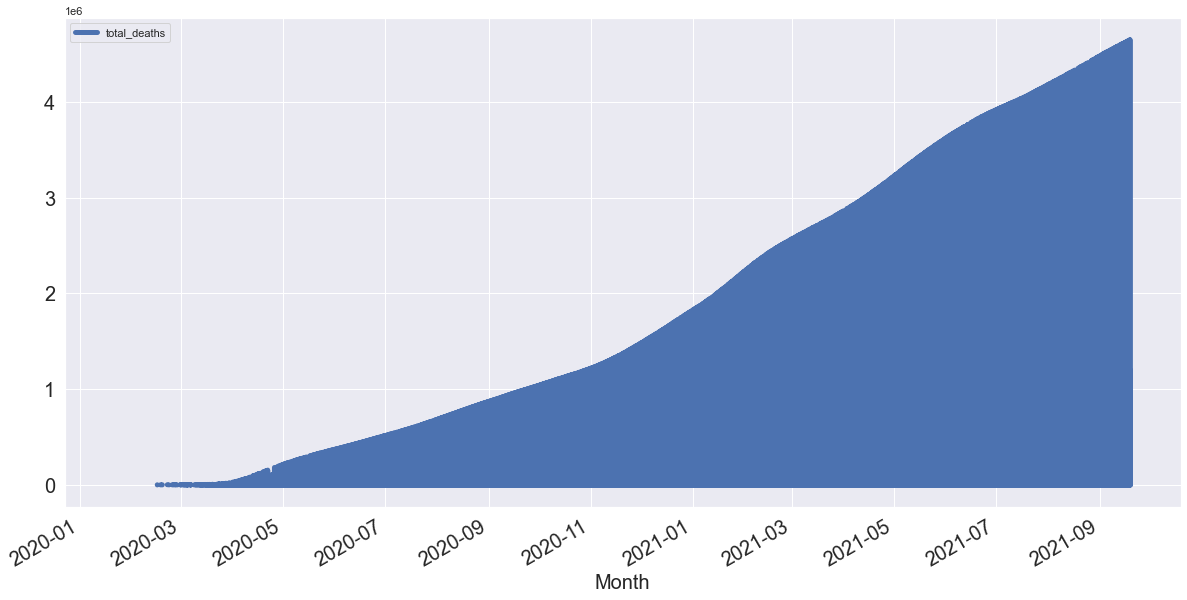

In [22]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

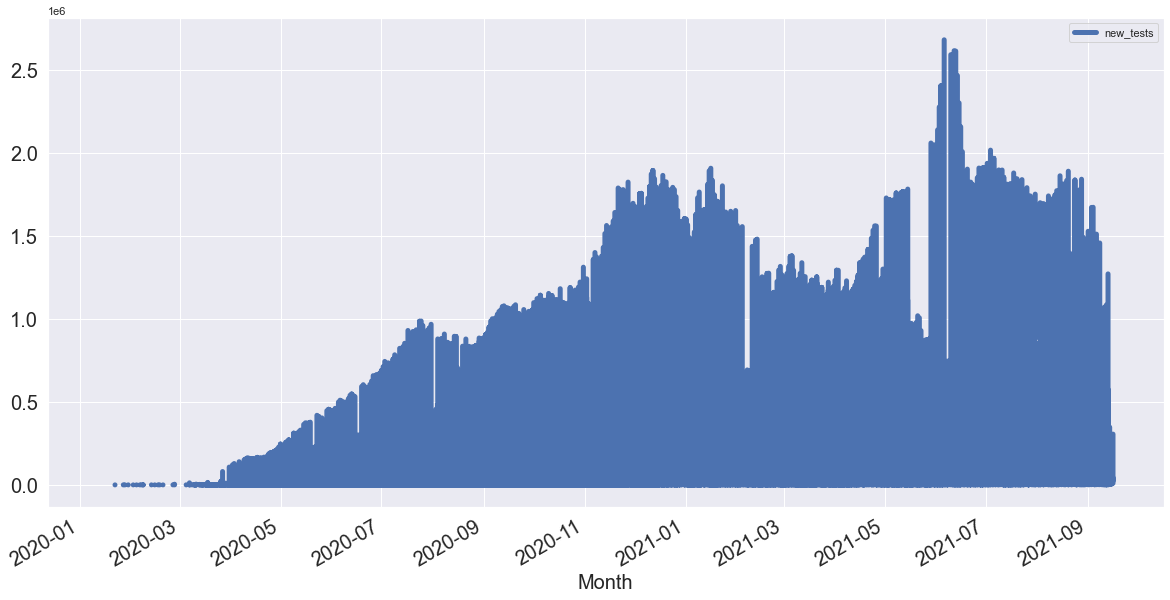

In [23]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

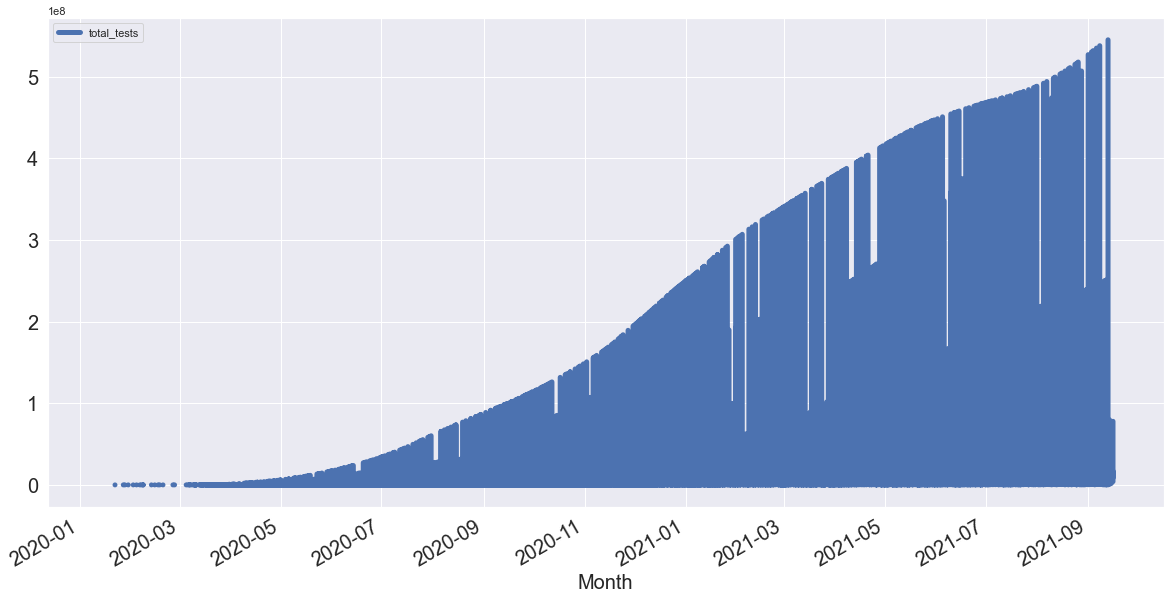

In [24]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

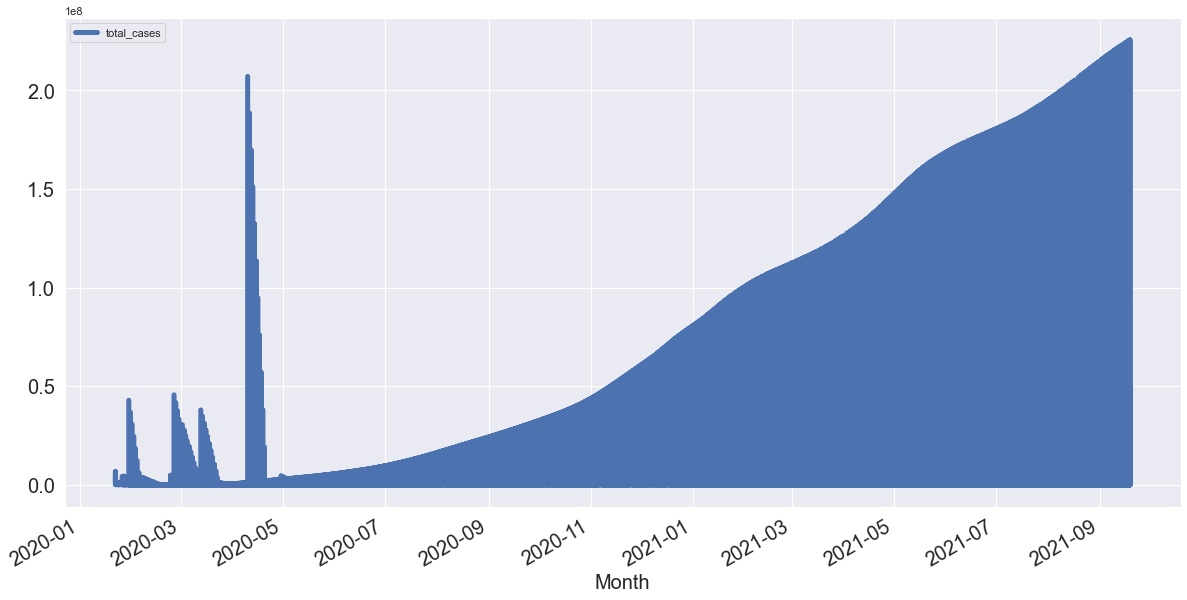

In [25]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);